In [1]:
# from pathlib import Path
# from typing import Iterable, Optional

# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.ticker import MaxNLocator


# # -------------------------
# # Global style (journal-ish)
# # -------------------------
# def set_pub_style():
#     plt.rcParams.update({
#         "figure.dpi": 120,
#         "savefig.dpi": 300,
#         "font.size": 12,
#         "axes.labelsize": 13,
#         "axes.titlesize": 14,
#         "legend.fontsize": 11,
#         "xtick.labelsize": 11,
#         "ytick.labelsize": 11,
#         "axes.grid": True,
#         "grid.alpha": 0.25,
#         "grid.linestyle": "--",
#         "axes.spines.top": False,
#         "axes.spines.right": False,
#         "lines.linewidth": 1.5,
#     })


# def _add_hlines(ax, hlines, label_prefix=""):
#     """
#     hlines: iterable of floats or iterable of (y, label) tuples
#     """
#     if hlines is None:
#         return

#     for item in hlines:
#         if isinstance(item, tuple):
#             y, label = item
#         else:
#             y, label = item, f"{label_prefix}{y}"

#         ax.axhline(y, linestyle=":", linewidth=1.2, alpha=0.9, label=label)


# def _rolling_mean(x, window):
#     if window is None or window <= 1:
#         return x
#     return pd.Series(x).rolling(window, min_periods=1, center=False).mean().values


# # -------------------------
# # Training loss plot
# # -------------------------
# def plot_training_loss(
#     log_csv_path: str | Path,
#     *,
#     out_path: Optional[str | Path] = None,
#     smooth_window: Optional[int] = 200,
#     hlines: Optional[Iterable[float | tuple[float, str]]] = None,
#     title: str = "Training Loss vs Steps",
# ):
#     set_pub_style()

#     df = pd.read_csv(log_csv_path)
#     df_loss = df[~df["train/loss"].isna()]

#     steps = df_loss["step"].to_numpy()
#     loss = df_loss["train/loss"].to_numpy()
#     loss_smooth = _rolling_mean(loss, smooth_window)

#     fig, ax = plt.subplots(figsize=(7.5, 4.8))

#     ax.plot(steps, loss, alpha=0.35, label="Train Loss (raw)")
#     if smooth_window and smooth_window > 1:
#         ax.plot(steps, loss_smooth, label=f"Smoothed (window={smooth_window})")

#     _add_hlines(ax, hlines, label_prefix="h=")

#     ax.set_xlabel("Training Steps")
#     ax.set_ylabel("MSE Loss")
#     ax.set_title(title)

#     ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#     ax.legend(frameon=False)
#     fig.tight_layout()

#     if out_path is not None:
#         out_path = Path(out_path)
#         fig.savefig(out_path, bbox_inches="tight")
#         print(f"Saved training loss plot to {out_path}")

#     plt.show()


# # -------------------------
# # Eval reward plot
# # -------------------------
# def plot_eval_reward(
#     log_csv_path: str | Path,
#     *,
#     out_path: Optional[str | Path] = None,
#     hlines: Optional[Iterable[float | tuple[float, str]]] = None,
#     title: str = "Evaluation Reward vs Steps",
#     marker: str = "o",
# ):
#     set_pub_style()

#     df = pd.read_csv(log_csv_path)
#     df_eval = df[~df["eval/mean_reward"].isna()]

#     steps = df_eval["step"].to_numpy()
#     rewards = df_eval["eval/mean_reward"].to_numpy()

#     fig, ax = plt.subplots(figsize=(7.5, 4.8))

#     ax.plot(steps, rewards, marker=marker, label="Eval Mean Reward")

#     _add_hlines(ax, hlines, label_prefix="threshold=")

#     ax.set_xlabel("Training Steps")
#     ax.set_ylabel("Mean Eval Reward")
#     ax.set_title(title)

#     ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#     ax.legend(frameon=False)
#     fig.tight_layout()

#     if out_path is not None:
#         out_path = Path(out_path)
#         fig.savefig(out_path, bbox_inches="tight")
#         print(f"Saved eval reward plot to {out_path}")

#     plt.show()


# # # -------------------------
# # # Combined figure (optional)
# # # -------------------------
# # def plot_loss_and_reward(
# #     log_csv_path: str | Path,
# #     *,
# #     out_path: Optional[str | Path] = None,
# #     smooth_window: Optional[int] = 200,
# #     reward_hlines: Optional[Iterable[float | tuple[float, str]]] = None,
# #     title: str = "Training Progress",
# # ):
# #     """
# #     Single figure with two subplots: loss (top), reward (bottom).
# #     Good for reports.
# #     """
# #     set_pub_style()

# #     df = pd.read_csv(log_csv_path)

# #     df_loss = df[~df["train/loss"].isna()]
# #     df_eval = df[~df["eval/mean_reward"].isna()]

# #     fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.5, 7.5), sharex=True)

# #     # ---- Loss ----
# #     if not df_loss.empty:
# #         steps_l = df_loss["step"].to_numpy()
# #         loss = df_loss["train/loss"].to_numpy()
# #         loss_smooth = _rolling_mean(loss, smooth_window)

# #         ax1.plot(steps_l, loss, alpha=0.3, label="Train Loss (raw)")
# #         if smooth_window and smooth_window > 1:
# #             ax1.plot(steps_l, loss_smooth, label=f"Smoothed (window={smooth_window})")

# #         ax1.set_ylabel("MSE Loss")
# #         ax1.set_title(title)
# #         ax1.legend(frameon=False)

# #     # ---- Reward ----
# #     if not df_eval.empty:
# #         steps_r = df_eval["step"].to_numpy()
# #         rewards = df_eval["eval/mean_reward"].to_numpy()

# #         ax2.plot(steps_r, rewards, marker="o", label="Eval Mean Reward")
# #         _add_hlines(ax2, reward_hlines, label_prefix="threshold=")

# #         ax2.set_xlabel("Training Steps")
# #         ax2.set_ylabel("Mean Eval Reward")
# #         ax2.legend(frameon=False)

# #     ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
# #     fig.tight_layout()

# #     if out_path is not None:
# #         out_path = Path(out_path)
# #         fig.savefig(out_path, bbox_inches="tight")
# #         print(f"Saved combined plot to {out_path}")

# #     plt.show()

In [2]:
from pathlib import Path
from typing import Iterable, Optional

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FuncFormatter

# -------------------------
# Configuration & Style
# -------------------------
# Professional Color Palette (Modern/Clean)
COLORS = {
    "raw_loss": "#B0BEC5",      # Light Blue-Grey (subtle for background)
    "smooth_loss": "#1565C0",   # Strong Blue (primary focus)
    "eval_line": "#00897B",     # Teal (distinct from loss)
    "target": "#E53935",        # Red (alert/target)
    "grid": "#E0E0E0",          # Very light grey
    "text": "#37474F"           # Dark Grey (softer than pure black)
}

def format_k(x, pos):
    """Formats 10000 as 10k, 1000 as 1k."""
    if x >= 1000:
        return f'{int(x/1000)}k'
    return f'{int(x)}'

def set_pub_style():
    plt.rcParams.update({
        "figure.dpi": 140,                # Higher resolution for screen
        "savefig.dpi": 300,               # Print resolution
        "font.family": "sans-serif",      # Clean look
        "font.sans-serif": ["Arial", "DejaVu Sans", "Helvetica"],
        "font.size": 12,
        "axes.labelsize": 13,
        "axes.titlesize": 15,
        "axes.titleweight": "bold",       # Make titles stand out
        "legend.fontsize": 11,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "axes.labelcolor": COLORS["text"],
        "xtick.color": COLORS["text"],
        "ytick.color": COLORS["text"],
        "axes.grid": True,
        "grid.color": COLORS["grid"],
        "grid.alpha": 0.6,
        "grid.linestyle": "--",
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.spines.left": True,         # Keep left spine
        "axes.spines.bottom": True,
        "lines.linewidth": 2,
    })

def _add_hlines(ax, hlines, label_prefix=""):
    if hlines is None:
        return

    for item in hlines:
        if isinstance(item, tuple):
            y, label = item
        else:
            y, label = item, f"{label_prefix}{y}"

        # Improved horizontal line style
        ax.axhline(y, color=COLORS["target"], linestyle="--", linewidth=1.5, alpha=0.8, label=label)

def _rolling_mean(x, window):
    if window is None or window <= 1:
        return x
    return pd.Series(x).rolling(window, min_periods=1, center=False).mean().values

# -------------------------
# Training loss plot
# -------------------------
def plot_training_loss(
    log_csv_path: str | Path,
    *,
    out_path: Optional[str | Path] = None,
    smooth_window: Optional[int] = 200,
    hlines: Optional[Iterable[float | tuple[float, str]]] = None,
    title: str = "Training Loss",
):
    set_pub_style()

    df = pd.read_csv(log_csv_path)
    # Ensure column exists, handle generic cases if needed
    col_name = "train/loss" if "train/loss" in df.columns else df.columns[1] # fallback
    df_loss = df[~df[col_name].isna()]

    steps = df_loss["step"].to_numpy()
    loss = df_loss[col_name].to_numpy()
    loss_smooth = _rolling_mean(loss, smooth_window)

    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot Raw Data (Background)
    ax.plot(steps, loss, color=COLORS["raw_loss"], alpha=0.5, linewidth=1, label="Raw Loss", zorder=1)
    
    # Plot Smoothed Data (Foreground)
    if smooth_window and smooth_window > 1:
        ax.plot(steps, loss_smooth, color=COLORS["smooth_loss"], linewidth=2.5, label=f"Smoothed (w={smooth_window})", zorder=2)

    _add_hlines(ax, hlines, label_prefix="h=")

    # Formatting
    ax.set_xlabel("Training Steps")
    ax.set_ylabel("MSE Loss")
    ax.set_title(title, pad=15) # Add padding to title
    
    # Use 'k' formatter (e.g., 20k instead of 20000)
    ax.xaxis.set_major_formatter(FuncFormatter(format_k))
    
    # Highlight the minimum loss point on the smooth curve
    min_idx = loss_smooth.argmin()
    ax.scatter(steps[min_idx], loss_smooth[min_idx], color=COLORS["smooth_loss"], s=50, zorder=3)
    
    ax.legend(frameon=True, framealpha=1, edgecolor="white", loc="upper right")
    fig.tight_layout()

    if out_path is not None:
        out_path = Path(out_path)
        fig.savefig(out_path, bbox_inches="tight")
        print(f"Saved training loss plot to {out_path}")

    plt.show()


# -------------------------
# Eval reward plot
# -------------------------
def plot_eval_reward(
    log_csv_path: str | Path,
    *,
    out_path: Optional[str | Path] = None,
    hlines: Optional[Iterable[float | tuple[float, str]]] = None,
    title: str = "Evaluation Reward",
    marker: str = "o",
):
    set_pub_style()

    df = pd.read_csv(log_csv_path)
    col_name = "eval/mean_reward" if "eval/mean_reward" in df.columns else df.columns[1]
    df_eval = df[~df[col_name].isna()]

    steps = df_eval["step"].to_numpy()
    rewards = df_eval[col_name].to_numpy()

    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot Line with white-edged markers for contrast
    ax.plot(
        steps, rewards, 
        color=COLORS["eval_line"], 
        marker=marker, 
        markersize=6, 
        markerfacecolor=COLORS["eval_line"],
        markeredgecolor="white",
        markeredgewidth=1.5,
        linewidth=2,
        label="Mean Reward"
    )

    _add_hlines(ax, hlines, label_prefix="Target: ")

    ax.set_xlabel("Training Steps")
    ax.set_ylabel("Mean Reward")
    ax.set_title(title, pad=15)

    # Use 'k' formatter
    ax.xaxis.set_major_formatter(FuncFormatter(format_k))
    
    # Optional: Fill under the curve slightly for visual weight
    ax.fill_between(steps, rewards, rewards.min(), color=COLORS["eval_line"], alpha=0.1)

    ax.legend(frameon=True, framealpha=1, edgecolor="white")
    fig.tight_layout()

    if out_path is not None:
        out_path = Path(out_path)
        fig.savefig(out_path, bbox_inches="tight")
        print(f"Saved eval reward plot to {out_path}")

    plt.show()

Saved training loss plot to mse_training_loss.png


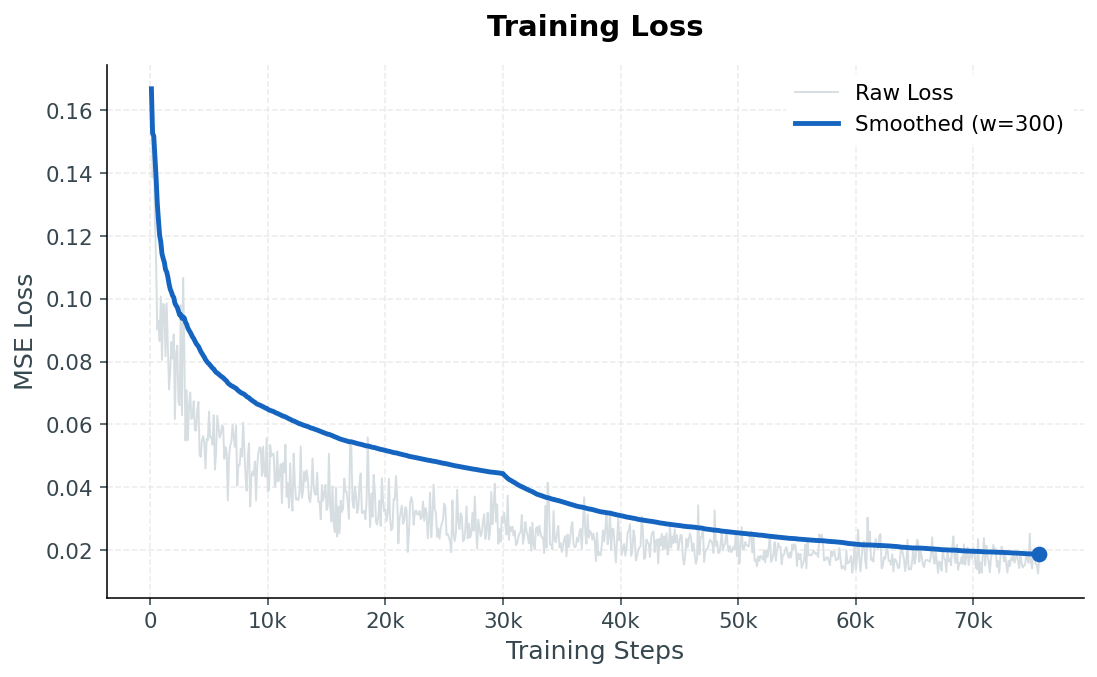

Saved eval reward plot to mse_eval_reward.png


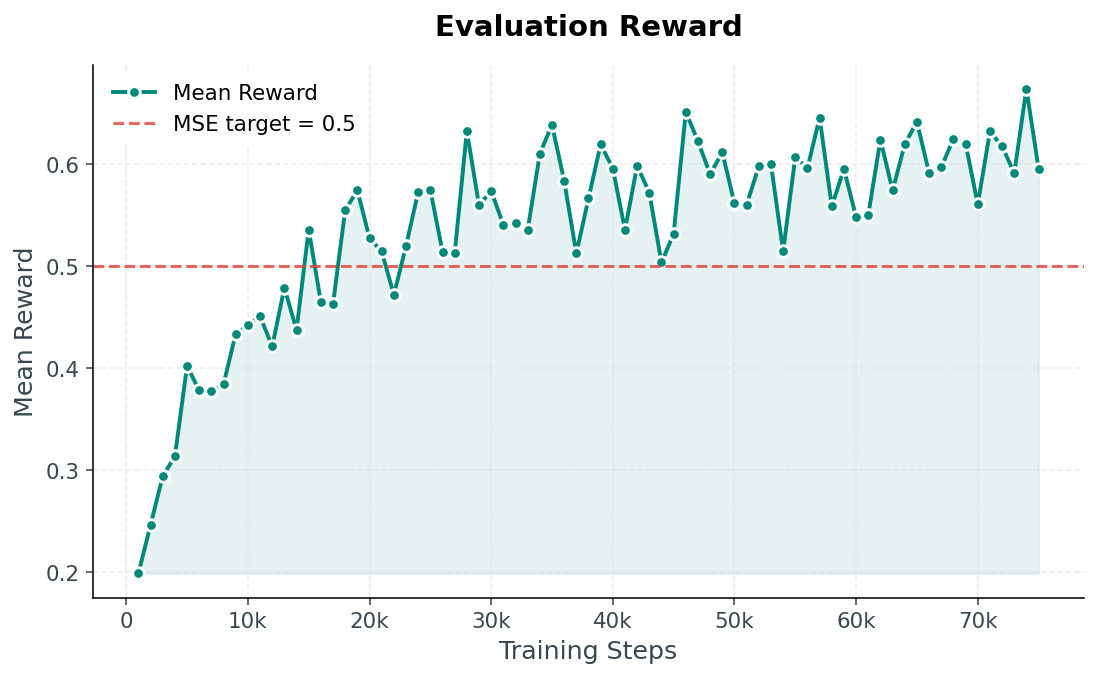

In [3]:
LOG = "./exp/mse_3/log.csv"

# MSE example (threshold 0.5)
plot_training_loss(
    LOG,
    out_path="mse_training_loss.png",
    smooth_window=300,
)

plot_eval_reward(
    LOG,
    out_path="mse_eval_reward.png",
    hlines=[(0.5, "MSE target = 0.5")],
)

# plot_loss_and_reward(
#     LOG,
#     out_path="mse_combined.png",
#     smooth_window=300,
#     reward_hlines=[(0.5, "MSE target = 0.5")],
# )

Saved training loss plot to flow_training_loss.png


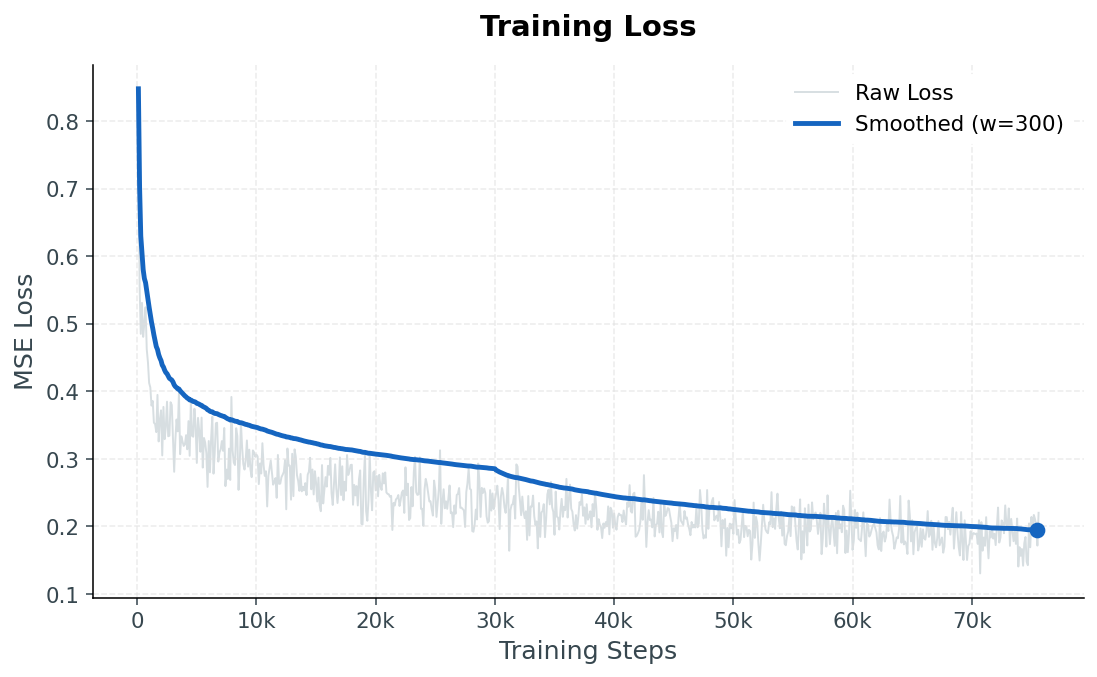

Saved eval reward plot to flow_eval_reward.png


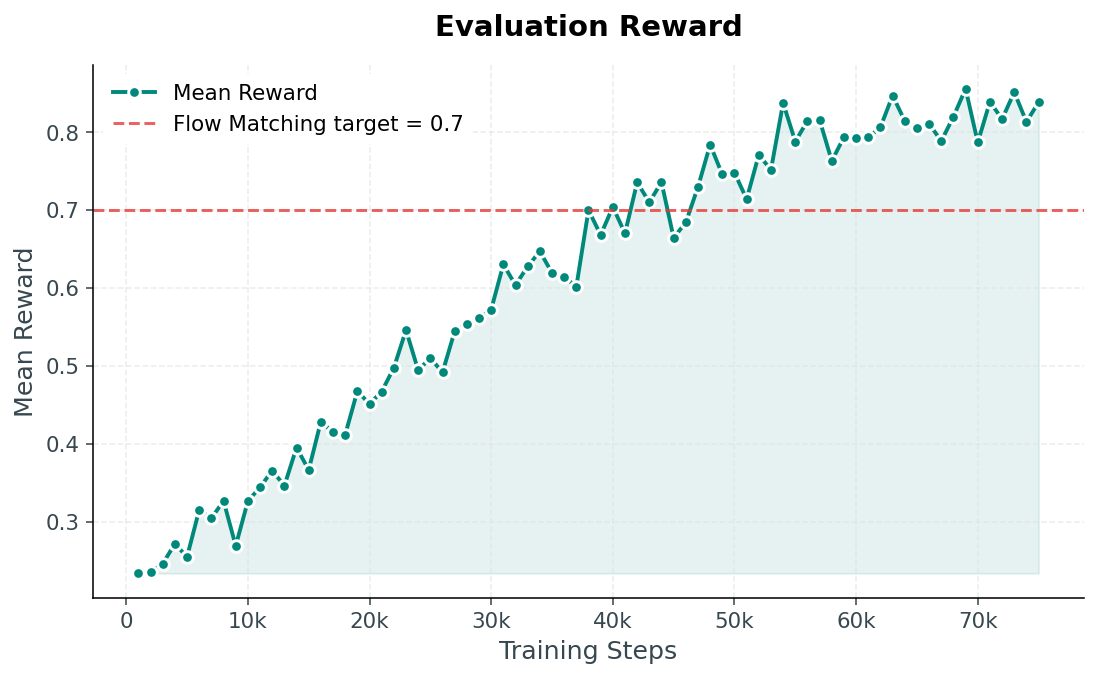

In [5]:
flow_log = "./exp/flow_2/log.csv"

plot_training_loss(
    flow_log,
    out_path="flow_training_loss.png",
    smooth_window=300,
)

plot_eval_reward(
    flow_log,
    out_path="flow_eval_reward.png",
    hlines=[(0.7, "Flow Matching target = 0.7")],
)